#  Principal Component Analysis

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
A=np.array([
    [3, 7],
    [-4, -6],
    [7, 8],
    [1, -1],
    [-4, -1],
    [-3, -7]
])

In [3]:
A

array([[ 3,  7],
       [-4, -6],
       [ 7,  8],
       [ 1, -1],
       [-4, -1],
       [-3, -7]])

In [4]:
df=pd.DataFrame(A, columns=['a0','a1'])

In [5]:
df

,a0,a1
0,3,7
1,-4,-6
2,7,8
3,1,-1
4,-4,-1
5,-3,-7


In [6]:
df.a1.std()

6.324555320336759

#  Co variance is how a column is related to another column

#  Cov (a0,a1)= (summation of ((a0- mean(a0))(a1- mean(a1))))/m-1

# m=total data

In [101]:
a0=A[:,0]

In [102]:
a1=A[:,1]

In [103]:
a0

array([ 3, -4,  7,  1, -4, -3])

In [104]:
a1

array([ 7, -6,  8, -1, -1, -7])

In [105]:
np.sum(a0*a1)/(len(a0)-1)

25.0

In [106]:
np.cov(a0,a1)

array([[20., 25.],
       [25., 40.]])

cov=(A^T A)/m-1

In [107]:
A.T

array([[ 3, -4,  7,  1, -4, -3],
       [ 7, -6,  8, -1, -1, -7]])

In [108]:
sigma=A.T @A/5  # @ is use for matrix multiplication 

In [109]:
l,x=np.linalg.eig(sigma)

In [110]:
l  # eigen values

array([ 3.07417596, 56.92582404])

In [111]:
x # eigen vector

array([[-0.82806723, -0.56062881],
       [ 0.56062881, -0.82806723]])

In [112]:
sigma

array([[20., 25.],
       [25., 40.]])

In [113]:
sigma@x[:,0]

array([-2.54562438,  1.72347161])

In [114]:
sigma@x[:,1]

array([-31.91425695, -47.13840945])

In [115]:
print('first principal component') #beacuse the eigen value of col 2 (l) is 56.92582404 higher than col 1 x
x[:,1]

first principal component


array([-0.56062881, -0.82806723])

In [116]:
print('second principal component')
x[:,0]

second principal component


array([-0.82806723,  0.56062881])

#  We have transform the dataset and we have to rotate the pc1 to become an x-axis

# we can do that by multiplying data set with principal component 1

In [117]:
pc1_arr=A@x[:,1]

In [118]:
pc1_arr

array([ -7.47835704,   7.21091862, -10.54893951,   0.26743842,
         3.07058247,   7.47835704])

In [119]:
pc2_arr=A@x[:,0]

In [120]:
pc2_arr

array([ 1.44019997, -0.05150393, -1.31144014, -1.38869604,  2.75164011,
       -1.44019997])

In [121]:
df=pd.read_csv('glass.csv')

In [122]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [123]:
df.rename(columns={'Type':'Class'},inplace=True)

In [124]:
df=df.drop(columns=['Class'])

#  check if the mean and standard deviation of each column is 0 and 1 respectively

In [125]:
df.describe() 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


#  The mean and standard deviation is not close to 0 and 1 so we are preprocessing the datadset

In [126]:
from sklearn.preprocessing import StandardScaler

In [127]:
scaler= StandardScaler()
df_scaled=scaler.fit_transform(df)

In [128]:
df1=pd.DataFrame(df_scaled)

In [129]:
df_scaled.T @df_scaled/213

array([[ 1.00469484e+00, -1.92786249e-01, -1.22848096e-01,
        -4.09238363e-01, -5.44597046e-01, -2.91193428e-01,
         8.14207404e-01, -3.87831208e-04,  1.43681016e-01],
       [-1.92786249e-01,  1.00469484e+00, -2.75017087e-01,
         1.57529788e-01, -7.01365474e-02, -2.67335737e-01,
        -2.76735643e-01,  3.28136226e-01, -2.42479493e-01],
       [-1.22848096e-01, -2.75017087e-01,  1.00469484e+00,
        -4.84060474e-01, -1.66705721e-01,  5.42099905e-03,
        -4.45833360e-01, -4.94573208e-01,  8.34494798e-02],
       [-4.09238363e-01,  1.57529788e-01, -4.84060474e-01,
         1.00469484e+00, -5.54965338e-03,  3.27488767e-01,
        -2.60810752e-01,  4.81654624e-01, -7.47514567e-02],
       [-5.44597046e-01, -7.01365474e-02, -1.66705721e-01,
        -5.54965338e-03,  1.00469484e+00, -1.94238511e-01,
        -2.09712117e-01, -1.02630894e-01, -9.46429875e-02],
       [-2.91193428e-01, -2.67335737e-01,  5.42099905e-03,
         3.27488767e-01, -1.94238511e-01,  1.004694

In [130]:
df1.describe()  # the mean and std dev of all the columns are very very close to 0 and 1

,0,1,2,3,4,5,6,7,8
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,-2.877034e-14,2.191393e-15,-1.328117e-16,-2.988264e-16,9.525091e-16,3.527811e-17,-3.154278e-16,-6.640586e-17,-3.735330e-17
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-2.381516e+00,-3.286943e+00,-1.865511e+00,-2.318616e+00,-3.676472e+00,-7.639186e-01,-2.484084e+00,-3.528768e-01,-5.864509e-01
25%,-6.082728e-01,-6.141580e-01,-3.957744e-01,-5.117560e-01,-4.800288e-01,-5.756501e-01,-5.049657e-01,-3.528768e-01,-5.864509e-01
50%,-2.262293e-01,-1.323817e-01,5.527787e-01,-1.704602e-01,1.799655e-01,8.905322e-02,-2.514132e-01,-3.528768e-01,-5.864509e-01
75%,2.614331e-01,5.120326e-01,6.361680e-01,3.715977e-01,5.649621e-01,1.735820e-01,1.518057e-01,-3.528768e-01,4.422417e-01
max,5.137232e+00,4.875637e+00,1.254639e+00,4.125851e+00,3.570524e+00,8.780145e+00,5.094318e+00,5.997210e+00,4.659881e+00


#  Now we have to find the covariance of the dataset

In [131]:
np.cov(df1)

array([[ 0.61967223,  0.1554839 ,  0.0095123 , ..., -0.36961439,
        -0.55499756, -0.52499357],
       [ 0.1554839 ,  0.23446913,  0.20927571, ..., -0.10528676,
        -0.06703188, -0.11242412],
       [ 0.0095123 ,  0.20927571,  0.26700812, ..., -0.07709654,
         0.03531121, -0.01133884],
       ...,
       [-0.36961439, -0.10528676, -0.07709654, ...,  2.02504465,
         1.91941657,  1.96842824],
       [-0.55499756, -0.06703188,  0.03531121, ...,  1.91941657,
         2.03457864,  2.03557203],
       [-0.52499357, -0.11242412, -0.01133884, ...,  1.96842824,
         2.03557203,  2.07393387]])

In [132]:
sigma= np.cov(df1.T @df1/213)

In [133]:
sigma.shape

(9, 9)

#  After covariance we have to find the eigen value and eigen vector

In [134]:
eigen_value, eigen_vector=np.linalg.eig(sigma)

In [135]:
print('value')
print(eigen_value)
print(" vector")
print(eigen_vector)

value
[ 7.95459574e-01  5.01826133e-01  2.38725720e-01  1.68466868e-01
  9.54450257e-02  3.51170435e-02  1.68473090e-02  4.12836126e-04
 -4.48980272e-18]
 vector
[[-0.5477725   0.27672378  0.10976887 -0.13918283 -0.07050246  0.11624781
  -0.07351638  0.75352172 -0.01625941]
 [ 0.25659463  0.29503459 -0.36075772 -0.50692805  0.11267589 -0.55758976
  -0.14888353  0.1259067   0.31364091]
 [-0.1056872  -0.59216636 -0.02128399 -0.39009833  0.08896386  0.30802287
   0.21082783  0.06552779  0.5779313 ]
 [ 0.42537043  0.27744272  0.34476793  0.1536245   0.06827541 -0.02201949
   0.69627163  0.2674183   0.1953638 ]
 [ 0.23081063 -0.13380421 -0.49318362  0.63271247 -0.01398654  0.08765363
  -0.20870484  0.37698015  0.30284849]
 [ 0.21942235 -0.18655251  0.66616159  0.06946705 -0.27785353 -0.2413525
  -0.50177133  0.1117469   0.2621824 ]
 [-0.49502834  0.34547937  0.02378581  0.28846465 -0.1583825  -0.14903575
   0.09537335 -0.40704883  0.5742228 ]
 [ 0.24554244  0.47181564  0.08991069 -0.1344651

In [136]:
max(eigen_value)

0.7954595740876083

In [137]:
print(df1.shape)
print(eigen_value.shape)
#print(len(eigen_value))
print(eigen_vector[0].shape)

(214, 9)
(9,)
(9,)


 shape of pc1= (214*9)*(9*1)=214*1

#  Rotate the line

In [138]:
pc1_data= df_scaled@ eigen_vector[:,0]

In [139]:
pc1_data

array([-1.14410031e+00,  5.82906727e-01,  9.50193528e-01,  1.51838295e-01,
        3.62508639e-01,  2.96015429e-01,  2.64458278e-01,  1.33143880e-01,
        2.52671176e-02,  1.03263151e-02,  3.89405265e-01,  2.43045106e-02,
        3.17407339e-01, -1.48314573e-01,  1.01571649e-01,  1.26950152e-01,
       -1.61700532e-01, -1.45598310e+00, -5.41816572e-01,  3.14516353e-01,
       -2.00745709e-01, -1.20709307e+00, -3.10584861e-02,  1.23350139e-01,
        1.57807675e-01,  6.10973359e-02,  1.63411921e-01,  2.27542051e-01,
        1.25267286e-01,  7.51524224e-02, -2.90377715e-01,  3.42213173e-02,
       -3.91394828e-01,  7.89755775e-02, -7.21912066e-02,  3.99558155e-01,
       -2.55145903e-01, -1.78098260e-02, -1.92789166e+00, -1.92789166e+00,
       -2.03185323e-01, -6.24329124e-03,  1.07073279e-01, -1.90364554e+00,
       -7.50913752e-01, -4.11412551e-01, -5.99876436e-01, -2.97457047e+00,
       -2.06842067e+00, -3.88682523e-01, -2.72666499e+00, -7.20398902e-01,
       -1.00435873e-01, -

In [140]:
pc2_data= df_scaled@eigen_vector[:,1]

In [141]:
pc2_data

array([-0.48062161, -0.69834502, -0.86987348, -0.92618816, -1.03757326,
       -1.45300449, -1.05926593, -1.16203233, -0.28284927, -1.09249113,
       -1.49203814, -1.07133472, -1.5237498 , -1.29083073, -1.14640574,
       -1.11789689, -1.14711362,  0.15753291, -0.22750732, -0.78284895,
       -1.08752248, -0.31348685, -1.00061079, -0.99724428, -0.87682235,
       -1.0091792 , -0.70810263, -1.0022137 , -1.02745879, -0.86628838,
       -1.21742358, -1.1140179 , -1.16927675, -1.16575486, -0.93931041,
       -0.95925264, -0.07015685, -0.91699027, -0.06018559, -0.06018559,
       -1.02909835, -1.06203033, -0.71026108, -0.0798395 , -1.33835485,
       -0.27275209, -0.83480799,  0.45710432, -0.14871107, -0.31120876,
       -0.14329374, -0.51678545, -0.36342221, -0.37147961, -0.5151356 ,
       -1.06975038, -1.93833306, -0.9263027 , -1.04455087, -1.06855025,
       -0.47996539,  0.59469725, -0.31862104,  0.24836376, -0.2268801 ,
        0.03554323, -0.4834026 , -0.50071829, -0.41563972,  0.05

#  validate the PC1 and PC2 are correct or not

#  1) PC1 and PC2 are orthogonal (perpendicular) to each other
# matrix multiplication of perpendicular vector is zero

# 2) Can do the reverse engineering

In [142]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [143]:
pca.fit_transform(df_scaled)

array([[ 1.15113957e+00, -5.29487638e-01],
       [-5.74137172e-01, -7.59787774e-01],
       [-9.40159722e-01, -9.29835966e-01],
       [-1.42083283e-01, -9.61677440e-01],
       [-3.51092291e-01, -1.09124921e+00],
       [-2.90266583e-01, -1.32400756e+00],
       [-2.52671444e-01, -1.11614958e+00],
       [-1.20299466e-01, -1.22184622e+00],
       [-2.08160308e-02, -3.21932609e-01],
       [-2.35222894e-03, -1.06581344e+00],
       [-3.82514937e-01, -1.38013403e+00],
       [-1.33538675e-02, -1.10471913e+00],
       [-3.09724390e-01, -1.42304024e+00],
       [ 1.56521013e-01, -1.23592823e+00],
       [-8.99566628e-02, -1.18125211e+00],
       [-1.15255023e-01, -1.16028212e+00],
       [ 1.73458320e-01, -1.18243967e+00],
       [ 1.45812372e+00,  9.88413780e-02],
       [ 5.47316267e-01, -2.95660130e-01],
       [-3.08817022e-01, -7.63162157e-01],
       [ 2.05673879e-01, -9.99182661e-01],
       [ 1.21605345e+00, -4.36896108e-01],
       [ 4.11679297e-02, -1.02788338e+00],
       [-1.

In [144]:
import matplotlib.pyplot as plt
pca=PCA()

In [145]:
principal_component=pca.fit_transform(df1)

Text(0.5, 1.0, 'screen Plot')

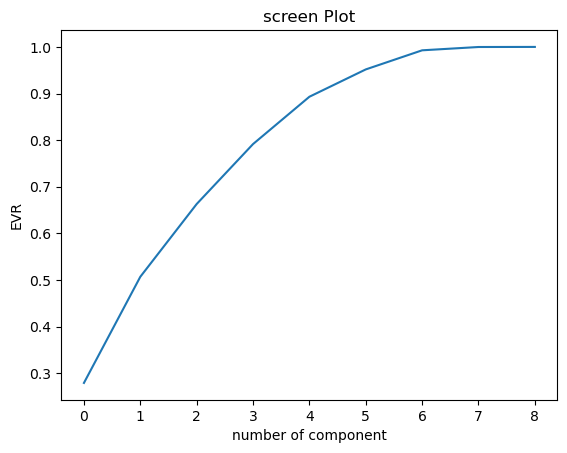

In [146]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of component")
plt.ylabel("EVR")
plt.title("screen Plot")

From the above Plot we can say the more than 90% of information is caputure by first 5 principal component.
By PCA we can say that we can use 5 Principal component for our model.

# Explained variance ratio:
is a measure of how much variance in the original data is explained by each principal component. It is calculated as the ratio of the eigenvalue of a principal component to the sum of all the eigenvalues of all the principal components

The explained variance ratio can be used to determine how many principal components to retain. A common rule of thumb is to retain the principal components that explain at least 95% of the variance in the data. This means that the first few principal components will capture most of the information in the data, while the later principal components will capture less and less information

In [147]:
pca.explained_variance_ratio_

array([2.79018192e-01, 2.27785798e-01, 1.56093777e-01, 1.28651383e-01,
       1.01555805e-01, 5.86261325e-02, 4.09953826e-02, 7.09477197e-03,
       1.78757536e-04])

In [208]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [209]:
data1 = pd.read_csv('glass.csv')

In [210]:
data1.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [211]:
data1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [212]:
data=data1.drop(columns=['Type'])

In [213]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [214]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


#  mean and std is not equals or close to zero and one
# have to make it by tranforming the dataset using Standard scaler

z statistics= x-mean/std

In [215]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler() 
z=scaler.fit_transform(data)

# Traditional method

In [216]:
df=pd.DataFrame(z, columns=data.columns)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [217]:
co=np.cov(z)

In [218]:
sigma=np.cov(data.T @data/213)

In [219]:
sigma.shape

(9, 9)

In [220]:
eg_val,eg_vec=np.linalg.eig(sigma)

In [221]:
eg_val

array([3.08740037e+06, 1.12127514e+00, 3.28904432e-01, 5.50500870e-02,
       6.97716771e-03, 1.35444075e-03, 6.69200028e-04, 4.49332365e-12,
       4.41362041e-06])

In [222]:
eg_vec

array([[ 2.03785597e-02, -1.29683860e-04, -3.66273908e-03,
         1.32332815e-03,  9.41703411e-03,  1.11939570e-02,
        -3.34476057e-02,  9.99088032e-01,  7.74023674e-03],
       [ 1.79959438e-01, -7.89532464e-03,  3.95077641e-01,
         7.26900892e-01,  4.86141944e-01,  2.44646433e-02,
        -2.10935719e-01, -1.53958227e-02,  3.76510036e-02],
       [ 3.59678293e-02,  7.19740872e-01, -5.56633015e-01,
         1.70257465e-01,  3.10010824e-02,  5.79154287e-02,
        -3.70232676e-01, -1.63508205e-02,  1.40223460e-02],
       [ 1.93884387e-02, -4.50068120e-02,  2.71647727e-01,
        -2.19448449e-01, -1.77614402e-01, -5.93152667e-01,
        -7.00790318e-01, -1.44953059e-02,  3.08904465e-02],
       [ 9.75208737e-01,  5.94948070e-02,  1.74668458e-02,
        -1.44621088e-01, -1.10607901e-01, -5.51781189e-03,
         1.07766646e-01, -1.48348533e-02, -1.04718637e-02],
       [ 6.63754855e-03,  7.62647864e-02,  1.26287983e-01,
        -6.01400305e-01,  6.86554118e-01,  3.174606

In [223]:
pc1_data = df @ eg_vec[:,0]
pc2_data = df @ eg_vec[:,1]

# by sklearn library 

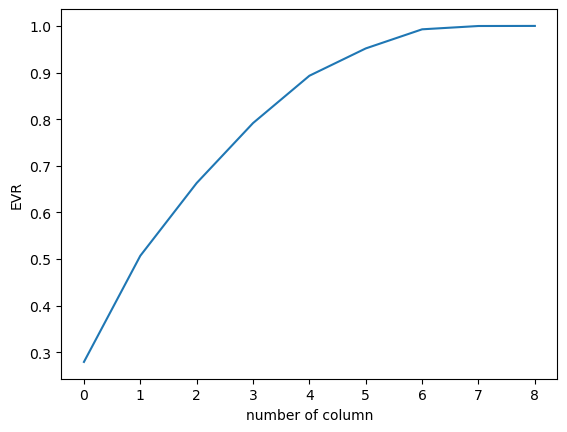

In [224]:
from sklearn.decomposition import PCA
pca  = PCA()
pca.fit_transform(df)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of column')
plt.ylabel('EVR')
plt.show()

In [225]:
pd.DataFrame(pca.fit_transform(df))

,0,1,2,3,4,5,6,7,8
0,1.151140,-0.529488,-0.372096,1.728901,-0.251936,0.340210,-0.395600,-0.197160,0.016346
1,-0.574137,-0.759788,-0.556708,0.760232,-0.257071,-0.115960,-0.024158,-0.284214,-0.010790
2,-0.940160,-0.929836,-0.554907,0.206254,-0.237506,0.126630,-0.367518,-0.095941,0.021640
3,-0.142083,-0.961677,-0.117125,0.415724,-0.476299,0.285805,-0.052497,-0.002959,0.092035
4,-0.351092,-1.091249,-0.485079,0.069102,-0.432090,0.298032,0.158570,-0.191316,0.002315
...,...,...,...,...,...,...,...,...,...
209,-2.383835,3.061677,0.090445,-0.376611,0.103227,0.231162,-1.320186,0.189401,-0.028657
210,-2.397652,3.108236,-1.117502,0.288454,0.624723,0.618056,0.582361,0.131651,-0.013663
211,-1.680246,3.284823,-0.930349,-0.171014,0.451687,1.247320,0.674122,-0.891710,0.046284
212,-2.369748,2.756873,-1.234701,-0.525285,0.515008,1.003352,0.678899,0.074460,-0.027301


In [226]:
pca.explained_variance_ratio_

array([2.79018192e-01, 2.27785798e-01, 1.56093777e-01, 1.28651383e-01,
       1.01555805e-01, 5.86261325e-02, 4.09953826e-02, 7.09477197e-03,
       1.78757536e-04])

In [227]:
pca1 = PCA(n_components=5)

In [228]:
new_data = pca1.fit_transform(df)

In [229]:
new_data

array([[ 1.15113957, -0.52948764, -0.37209565,  1.72890103, -0.25193583],
       [-0.57413717, -0.75978777, -0.55670817,  0.76023228, -0.25707069],
       [-0.94015972, -0.92983597, -0.55490744,  0.20625431, -0.23750587],
       ...,
       [-1.68024627,  3.28482346, -0.93034851, -0.17101386,  0.45168739],
       [-2.36974768,  2.7568728 , -1.23470076, -0.52528451,  0.51500795],
       [-2.26264885,  3.02859155, -0.89084474, -0.41449108,  0.50547398]])

In [230]:
x = pd.DataFrame(new_data  , columns=['PC1' , 'PC2','PC3' , 'PC4','PC5'])

In [231]:
x

,PC1,PC2,PC3,PC4,PC5
0,1.151140,-0.529488,-0.372096,1.728901,-0.251936
1,-0.574137,-0.759788,-0.556708,0.760232,-0.257071
2,-0.940160,-0.929836,-0.554907,0.206254,-0.237506
3,-0.142083,-0.961677,-0.117125,0.415724,-0.476299
4,-0.351092,-1.091249,-0.485079,0.069102,-0.432090
...,...,...,...,...,...
209,-2.383835,3.061677,0.090445,-0.376611,0.103227
210,-2.397652,3.108236,-1.117502,0.288454,0.624723
211,-1.680246,3.284823,-0.930349,-0.171014,0.451687
212,-2.369748,2.756873,-1.234701,-0.525285,0.515008


In [232]:
y= data1.Type

In [233]:
x

,PC1,PC2,PC3,PC4,PC5
0,1.151140,-0.529488,-0.372096,1.728901,-0.251936
1,-0.574137,-0.759788,-0.556708,0.760232,-0.257071
2,-0.940160,-0.929836,-0.554907,0.206254,-0.237506
3,-0.142083,-0.961677,-0.117125,0.415724,-0.476299
4,-0.351092,-1.091249,-0.485079,0.069102,-0.432090
...,...,...,...,...,...
209,-2.383835,3.061677,0.090445,-0.376611,0.103227
210,-2.397652,3.108236,-1.117502,0.288454,0.624723
211,-1.680246,3.284823,-0.930349,-0.171014,0.451687
212,-2.369748,2.756873,-1.234701,-0.525285,0.515008


In [234]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [235]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x,y)

DecisionTreeClassifier()

In [236]:
data1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [239]:
dt_model.predict(pca1.transform(scaler.transform([[1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0]])))

C:\Users\arvin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\arvin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\arvin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [ ]:
def pc_calculation(x, no):
    pca = {}
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)
    l,x = np.linalg.eig((x_scaled.T @ x_scaled)/(x_scaled.shape[0]-1))
    for i in range(no):
        pc = x_scaled @x[:,i]
        pca[i] = pc
    pca_df = pd.DataFrame(pca)
    return pca_df